# Credit Card Fraud Detection

The raw file used for this project is on kaggle, click <a href="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud">here</a> to go to the file location on kaggle.

In [21]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import warnings
warnings.simplefilter(action="ignore")
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression

In [4]:
with ZipFile("./creditcard.zip") as myzip:
    with myzip.open('creditcard.csv', "r") as myfile:
        data = pd.read_csv(myfile)

print(f"Shape of the data: {data.shape}")
data.head()

Shape of the data: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Time     284807 non-null  float64
 1   V1       284807 non-null  float64
 2   V2       284807 non-null  float64
 3   V3       284807 non-null  float64
 4   V4       284807 non-null  float64
 5   V5       284807 non-null  float64
 6   V6       284807 non-null  float64
 7   V7       284807 non-null  float64
 8   V8       284807 non-null  float64
 9   V9       284807 non-null  float64
 10  V10      284807 non-null  float64
 11  V11      284807 non-null  float64
 12  V12      284807 non-null  float64
 13  V13      284807 non-null  float64
 14  V14      284807 non-null  float64
 15  V15      284807 non-null  float64
 16  V16      284807 non-null  float64
 17  V17      284807 non-null  float64
 18  V18      284807 non-null  float64
 19  V19      284807 non-null  float64
 20  V20      284807 non-null  

Two things could be deduced from the investigations made above:
<ol><li>All the columns of the data are numeric values</li><li>There is/are no null values in the data.</li></ol>
It seems someone someone has done the <b>dirty</b> job for us to have a <b>clean</b> data. 😄

In [29]:
data.isna().sum()

Time       0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
Amount     0
Class      0
Time_Hr    0
dtype: int64

In [9]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
data["Class"].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

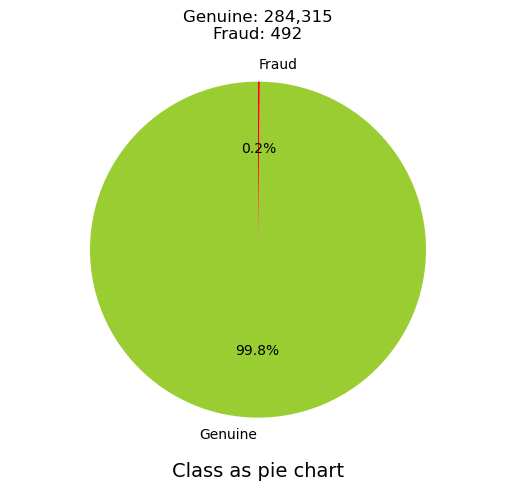

In [11]:
# Check Class variables that have 0 value for Genuine transactions and 1 for Fraud
fig, ax = plt.subplots(1, 1)
ax.pie(data.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','red'], startangle=90)
plt.axis('equal')
plt.xlabel('\nClass as pie chart', size=14)
plt.title(f"Genuine: {data['Class'].value_counts().iloc[0]:,}\nFraud: {data['Class'].value_counts().iloc[1]:,}\n", size=12)
plt.show()

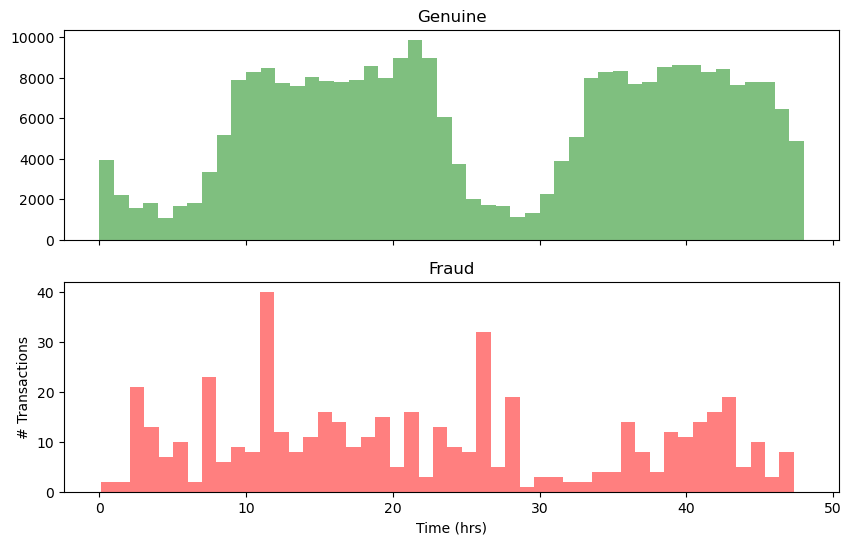

In [12]:
data["Time_Hr"] = data["Time"]/3600 # convert to hours
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(10,6))
ax1.hist(data.Time_Hr[data.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(data.Time_Hr[data.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# Transactions')
plt.show()

/Users/jagunmolu/tensorflow-test/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jagunmolu/tensorflow-test/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


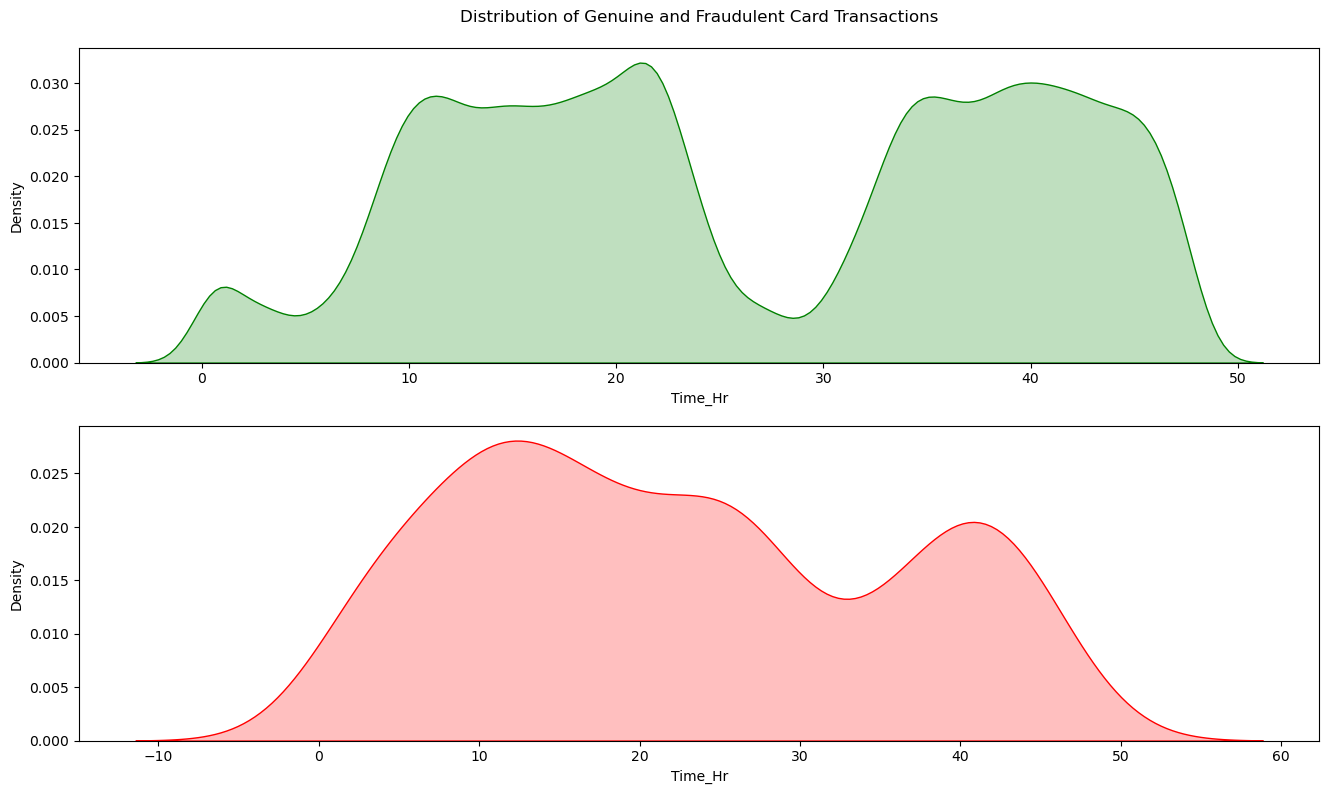

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(16, 9))
axs = axs.ravel()
sns.kdeplot(data[data["Class"] == 0]["Time_Hr"], fill=True, ax=axs[0], color="g", label="Genuine")
sns.kdeplot(data[data["Class"] == 1]["Time_Hr"], fill=True, ax=axs[1], color="r", label="Fraud")
axs[0].set_title("Distribution of Genuine and Fraudulent Card Transactions\n")
plt.show()

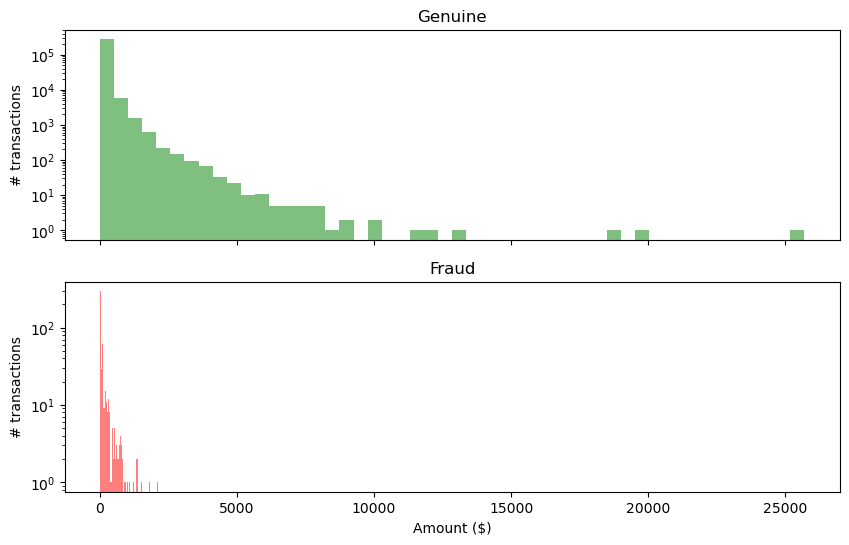

In [14]:
#let us check another feature Amount
fig, (ax3,ax4) = plt.subplots(2, 1, figsize = (10,6), sharex = True)
ax3.hist(data.Amount[data.Class==0], bins=50,color='g', alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(data.Amount[data.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')
plt.show() 

In [19]:
df = data.copy()

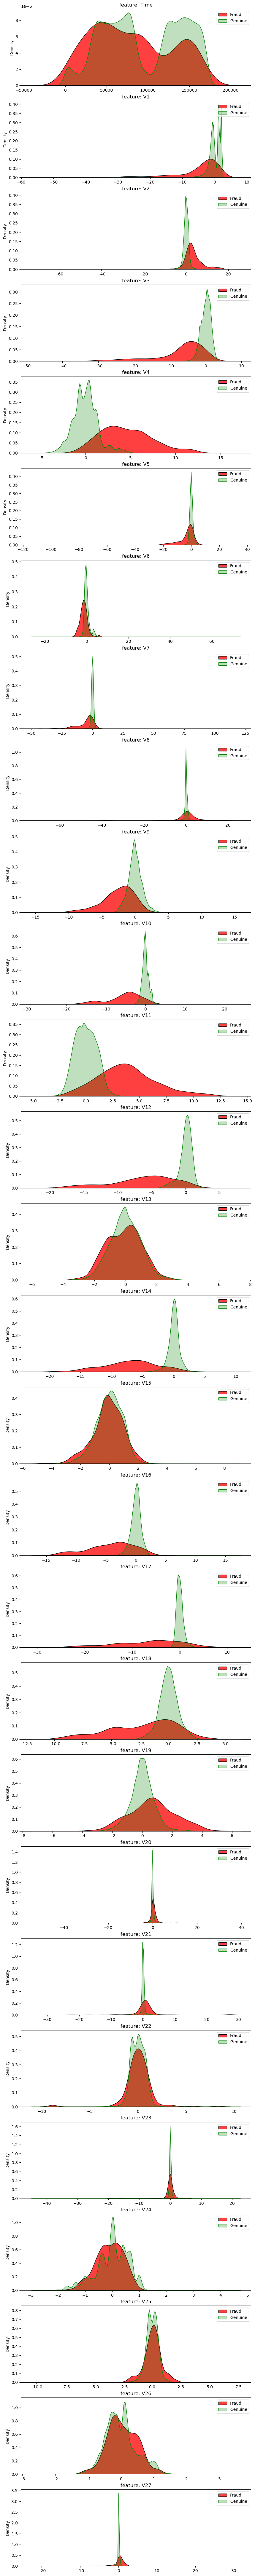

In [27]:
#let us check correlations and shapes of those 28 principal components.
# Features V1, V2, ... V28 are the principal components obtained with PCA.
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(10, 28*4))
data = data.replace([np.inf, -np.inf], np.nan)
for i, col in enumerate(data[data.iloc[:, 0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.kdeplot(data[col][data.Class == 1], color='r', label="Fraud", fill=True, multiple="stack")
    sns.kdeplot(data[col][data.Class == 0], color='g', label="Genuine", fill=True)
    ax5.set_xlabel('')
    plt.legend()
    ax5.set_title('feature: ' + str(col))
    # break
plt.show()

In [16]:
drop_list = ['Time_Hr', 'V13' ,'V15', 'V22', 'V23', 'V25', 'V26', 'Time']

In [17]:
def split_data(df, drop_list):
    df=df.drop(drop_list, axis=1)
    X=df.drop(['Class'], axis=1) 
    Y=df["Class"] 
    xData = X.values
    yData = Y.values
    xTrain, xTest, yTrain, yTest = train_test_split( 
            xData, yData, test_size=0.2, random_state=42)
    return xTrain, xTest, yTrain, yTest

In [18]:
x_train, x_test, y_train, y_test = split_data(data, drop_list)

NameError: name 'train_test_split' is not defined